In [ ]:
# World Water Resource (compariton with respect to Nepal)
# 2019/3/9

from bs4 import BeautifulSoup
import requests 
import pandas as pd

    
#Web Scrping for renewable water resources 

URL='https://en.wikipedia.org/wiki/List_of_countries_by_total_renewable_water_resources#cite_note-4'
response=requests.get(URL)
soup=BeautifulSoup(response.text,'html.parser')

table=soup.find('table',{'class':'wikitable sortable'}).tbody  #table body with class nanme 'wikitable sortable'

rows=table.find_all('tr')

columns=[v.text.replace('\n','') for v in rows[0].find_all('th')] # extracting name from only first column 


df=pd.DataFrame(columns=columns)

for i in range(1,len(rows)):
    tds=rows[i].find_all('td')
    
    if len(tds)==3:
        values=[tds[0].text,tds[1].text.replace('\xa0',''),tds[2].text.replace('\n','')]
    else:
        values=[td.text.replace('\xa0','').replace('\n','') for td in tds]
    #print(values)
    #break
    
    df=df.append(pd.Series(values,index=columns),ignore_index=True)
    df.to_csv(r'C:\Users\User\Desktop\data1.csv',index=False)


In [ ]:
#for countries area
URL='https://simple.wikipedia.org/wiki/List_of_countries_by_area'
response=requests.get(URL)
soup=BeautifulSoup(response.text,'html.parser')

table=soup.find('table',{'class':False}).tbody

rows=table.find_all('tr')

#print(rows)

columns=[v.text.replace('\n','') for v in rows[0].find_all('th') ]

df=pd.DataFrame(columns=columns)


for i in range(1,len(rows)):
    tds=rows[i].find_all('td')
    if len(tds)==2:
        values=[tds[0].text,tds[1].text.tds[2].text.replace('\n','')]
    else:
        values=[td.text.replace('\n','') for td in tds]
    #print(values)
    df=df.append(pd.Series(values,index=columns),ignore_index=True)
    df.to_csv(r'C:\Users\User\Desktop\data2.csv',index=False)


In [17]:
#for world population

from bs4 import BeautifulSoup
import requests 
import pandas as pd


URL='https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
response=requests.get(URL)
soup=BeautifulSoup(response.text,'html.parser')

#print(soup)

table=soup.find('table',{'class':'wikitable sortable plainrowheaders'}).tbody

rows=table.find_all('tr')

columns=[v.text.replace('\n','').replace('[4]','').replace('[5]','') for v in rows[0].find_all('th')]


df=pd.DataFrame(columns=columns)

for i in range(1,len(rows)):
    tds=rows[i].find_all('td')
    if len(tds)==7:
        values=[tds[0].text.replace('\n',''),tds[1].text.replace('\xa0','').replace("['a:z']",''),tds[2].text,tds[3].text.replace('\n',''),tds[4].text.replace('\n',''),tds[5].text.replace('\n',''),tds[6].text.replace('\n','')]
    else:
        values=[td.text.replace('\n','') for td in tds]
    
    df=df.append(pd.Series(values,index=columns),ignore_index=True)
df.to_csv(r'C:\Users\User\Desktop\data3.csv',index=False)
    

#print(columns)

#print(table)

In [ ]:
'''## combining the two data sets

import csv
import glob

csvfile=glob.glob(r'C:\Users\User\Desktop\*.csv')
wf=csv.writer(r'C:\Users\User\Desktop\output.csv')

for files in csvfile:
    #print(files)
    rd=csv.reader(open(files,'r'),delimiter=',')
    next(rd)
    for row in rd:
        #print(row)
        wf.writerow(wf)'''
        


In [ ]:
'''import os
import glob
import pandas as pd

def concatenate(indir=r'C:\Users\User\Desktop',output="C:\\Users\\User\\Desktop\\output.csv"):
    os.chdir(indir)
    print(os.getcwd())
    fileList=glob.glob("*.csv")
    print(fileList)
    dfList=[]
    colnames=["Country","Total renewable  water resources  (km³)","Date of  Information","Area (km²)"]
    
    for filename in fileList:
        print(filename)
        df=pd.read_csv(filename,header=None,encoding = "ISO-8859-1")
        print(df)
        dfList.append(df)
    concatDF=pd.concat(dfList,axis=0,sort=True)
    concatDF.columns=colnames
    concatDF.to_csv(output)
    
concatenate()'''

C:\Users\User\Desktop


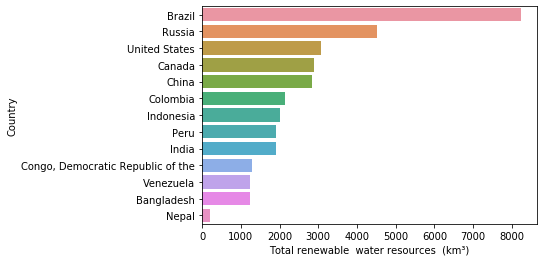

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
os.chdir(r'C:\Users\User\Desktop')
print(os.getcwd())
data1=pd.read_csv(r'test1.csv',encoding = "ISO-8859-1")
#data=sns.load_dataset('tips')
data1.head()
sns.barplot(x='Total renewable  water resources  (km³)',y='Country',data=data1)


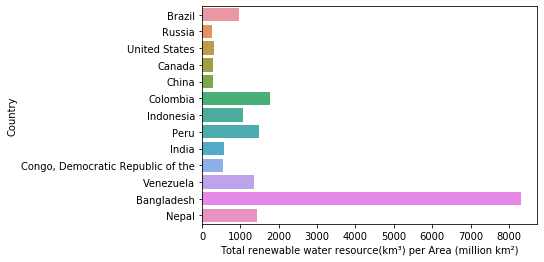

In [3]:
sns.barplot(x='Total renewable water resource(km³) per Area (million km²)',y='Country',data=data1)
plt.show()

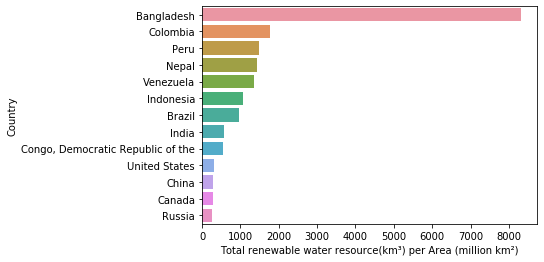

In [4]:
data2=data1.sort_values('Total renewable water resource(km³) per Area (million km²)',ascending=False)
sns.barplot(x='Total renewable water resource(km³) per Area (million km²)',y='Country',data=data2)



In [ ]:
plt.savefig("total renewable water resource (km3) per Area (million Km2)",bbox_inches="tight",pad_inches=1,transparen=True)

In [131]:
#Merging all three data sets

os.chdir(r'C:\Users\User\Desktop')
print(os.getcwd())
df1=pd.read_csv(r'data.csv',encoding = "ISO-8859-1")
df2=pd.read_csv(r'data2.csv',encoding = "ISO-8859-1")
df3=pd.read_csv(r'data3.csv',encoding = "ISO-8859-1")

df_output=pd.merge(pd.merge(df1,df2,on='Country',how='inner'),df3,on='Country',how='inner')




C:\Users\User\Desktop


In [132]:
df_output


,SN,Country,Total renewable water resources (km³),Pos,Area (km²),Rank,UN continentalregion,UN statisticalregion,Population(1 July 2018),Population(1 July 2019),Change
0,1,Brazil,"8,233",5,"8,515,767",6,Americas,South America,"209,469,323",211049527,0.80%
1,2,Russia,"4,508",1,"17,098,246",9,Europe,Eastern Europe,"145,734,038",145872256,0.10%
2,3,United States,"3,069",4,"9,525,067",3,Americas,Northern America,"327,096,265",329064917,0.60%
3,4,Canada,"2,902",2,"9,984,670",39,Americas,Northern America,"37,074,562",37411047,0.90%
4,5,China,"2,840",3,"9,572,900",1,Asia,Eastern Asia,"1,427,647,786",1433783686,0.40%
5,6,Colombia,"2,132",26,"1,197,411",29,Americas,South America,"49,661,048",50339443,1.40%
6,7,Indonesia,"2,019",15,"1,904,556",4,Asia,South-eastern Asia,"267,670,543",270625568,1.10%
7,8,Peru,"1,913",20,"1,285,220",43,Americas,South America,"31,989,260",32510453,1.60%
8,9,India,"1,911",7,"3,287,263",2,Asia,Southern Asia,"1,352,642,280",1366417754,1.00%
9,11,Venezuela,"1,233",33,"912,050",50,Americas,South America,"28,887,118",28515829,â1.3%


In [133]:
df_output.drop(df_output.columns[[0,5,6,7,8,10]],axis=1,inplace=True)

In [134]:
df_output.head()

,Country,Total renewable water resources (km³),Pos,Area (km²),Population(1 July 2019)
0,Brazil,"8,233",5,"8,515,767",211049527
1,Russia,"4,508",1,"17,098,246",145872256
2,United States,"3,069",4,"9,525,067",329064917
3,Canada,"2,902",2,"9,984,670",37411047
4,China,"2,840",3,"9,572,900",1433783686


In [135]:
df_output.drop('Pos',axis=1,inplace=True)

In [136]:
#df_output.drop('SN',axis=1,inplace=True)
df_output.head(0)

,Country,Total renewable water resources (km³),Area (km²),Population(1 July 2019)


In [137]:
df_output.to_csv('output.csv')


In [98]:
#df_output.columns['Total renewable water resources (km³)']=df_output.columns['Total renewable water resources (km³)'].astype(str)
#f[col] = df[col].astype(str)

#df_output.columns['Total renewable water resources (km³)']=df_output.columns['Total renewable water resources (km³)'].str.replace(',', '')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [144]:
output=pd.read_csv(r'output.csv',encoding = "ISO-8859-1")


In [160]:
output.head()

,Country,Total renewable water resources (km³),Area (km²),Population(1 July 2019)
0,Brazil,8233,8515767,211049527
1,Russia,4508,17098246,145872256
2,United States,3069,9525067,329064917
3,Canada,2902,9984670,37411047
4,China,2840,9572900,1433783686


In [140]:
#output.drop(output.columns[[0]],axis=1,inplace=True)


In [157]:
#output

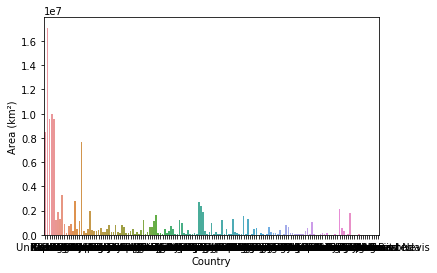

In [162]:
sns.barplot(x='Country',y='Area (km²)',data=output)
plt.show()